<a href="https://colab.research.google.com/github/DrBisu/CHORUS-score-calculator/blob/main/ANN_CI_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import xgboost
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
from keras import callbacks
from keras.models import model_from_json
from keras.wrappers.scikit_learn import KerasClassifier
!pip install tensorflowjs
import tensorflowjs as tfjs


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Interconsultant_Reliability_1_Randomized.xlsx to Interconsultant_Reliability_1_Randomized.xlsx


In [4]:
import io
import cv2

# Training + Testing set

df = pd.read_excel(io.BytesIO(uploaded['Interconsultant_Reliability_1_Randomized.xlsx']))

X = df.drop(['Acceptance Status'], axis = 1)
Y = df['Acceptance Status']
object = StandardScaler()
X[['GCS']] = object.fit_transform(df[['GCS']])
X[['Age']] = object.fit_transform(df[['Age']])

X_train = X.iloc[:1050]
Y_train = Y.iloc[:1050]
X_test = X.iloc[-450:]
Y_test = Y.iloc[-450:]


#X, X_valid, Y, Y_valid = train_test_split(X, Y, test_size=0.15, random_state=42, stratify = Y)

#X_test, X_valid, Y_test, Y_valid = train_test_split(X_temp_test, Y_temp_test, test_size=0.50, random_state=42, stratify = Y_temp_test)


In [5]:
kfold = RepeatedStratifiedKFold(n_splits=4, n_repeats =1, random_state=0)
cvscores = []

for train, test in kfold.split(X, Y):
        # Define a Deep Learning Model
        model = Sequential()

        model.add(Dense(32, input_shape = (10,)))
        model.add(Dense(64, Activation ('relu')))
        model.add(Dense(64, Activation ('relu')))
        model.add(Dense(128, Activation ('relu')))
        model.add(Dense(256, Activation('relu')))
        model.add(Dense(512, Activation('relu')))
        model.add(Dropout(0.2))
        model.add(Dense(512, Activation('relu')))
        model.add(Dense(1, Activation('sigmoid')))
    
        # Compile the Model
        learning_rate = 0.001
        EPOCHS = 400
        optimizer = optimizers.SGD(learning_rate)
        model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=False), optimizer = optimizer, metrics = [tf.keras.metrics.SpecificityAtSensitivity(0.95),'Accuracy','Recall','Precision','AUC','MeanSquaredError'])

        # Train the Model
        X_train1 = X.iloc[train]
        Y_train1 = Y.iloc[train]
        X_test1 = X.iloc[test]
        Y_test1 = Y.iloc[test]
        model.fit(X_train1,Y_train1,validation_data=(X_test1,Y_test1),verbose=0,
              epochs=EPOCHS, batch_size = 7)

        #model.save('my model')
        #tfjs.converters.save_keras_model(model, "model1.CV")

        # evaluate the model
        scores = model.evaluate(X_test, Y_test, verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
        print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))
        print("%s: %.2f%%" % (model.metrics_names[4], scores[4]*100))
        print("%s: %.4f%%" % (model.metrics_names[5], scores[5]))
        print("%s: %.2f%%" % (model.metrics_names[6], scores[6]*100))
        print("This is a fold")
        cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

specificity_at_sensitivity: 98.38%
Accuracy: 97.33%
recall: 95.74%
precision: 95.74%
auc: 0.9936%
mean_squared_error: 2.04%
This is a fold
specificity_at_sensitivity_1: 99.03%
Accuracy: 97.56%
recall: 96.45%
precision: 95.77%
auc: 0.9948%
mean_squared_error: 2.19%
This is a fold
specificity_at_sensitivity_2: 98.71%
Accuracy: 97.11%
recall: 96.45%
precision: 94.44%
auc: 0.9914%
mean_squared_error: 2.45%
This is a fold
specificity_at_sensitivity_3: 98.71%
Accuracy: 96.67%
recall: 90.78%
precision: 98.46%
auc: 0.9961%
mean_squared_error: 2.33%
This is a fold
98.71% (+/- 0.23%)


In [8]:
model.save("my_model")

# It can be used to reconstruct the model identically.
tfjs.converters.save_keras_model(model, "my_model")

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
#Testing set results
from sklearn.metrics import confusion_matrix

Y_pred1 = model.predict(X_test)
Y_pred1 = (Y_pred1 > 0.5)
Y_pred1.shape = (450,)

confusion_matrix(Y_test, Y_pred1)



Accuracy=0.953333, 95% CI: 0.933333-0.971111
AUC=0.940956, 95% CI: 0.914228-0.965278
Recall=0.907801, 95% CI: 0.857143-0.952756
Precision=0.941176, 95% CI: 0.900000-0.977099
Brier=0.046667, 95% CI: 0.028889-0.066667


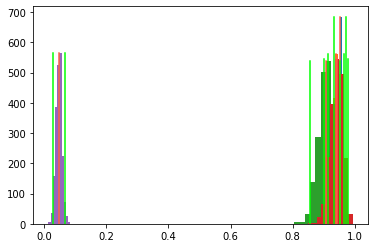

In [ ]:
#Testing set results
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, brier_score_loss

#Accuracy
score, ci_lower, ci_upper, scores = stat_util.score_ci(Y_test, Y_pred1,
                                                       score_fun=accuracy_score,
                                                       seed=42)

bins = plt.hist(scores)
plt.plot([score, score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("Accuracy={:.6f}, 95% CI: {:.6f}-{:.6f}".format(score, ci_lower, ci_upper))

#AUROC
score, ci_lower, ci_upper, scores = stat_util.score_ci(Y_test, Y_pred1,
                                                       score_fun=roc_auc_score,
                                                       seed=42)

bins = plt.hist(scores)
plt.plot([score, score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("AUC={:.6f}, 95% CI: {:.6f}-{:.6f}".format(score, ci_lower, ci_upper))

#Recall
score, ci_lower, ci_upper, scores = stat_util.score_ci(Y_test, Y_pred1,
                                                       score_fun=recall_score,
                                                       seed=42)

bins = plt.hist(scores)
plt.plot([score, score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("Recall={:.6f}, 95% CI: {:.6f}-{:.6f}".format(score, ci_lower, ci_upper))

#Precision
score, ci_lower, ci_upper, scores = stat_util.score_ci(Y_test, Y_pred1,
                                                       score_fun=precision_score,
                                                       seed=42)

bins = plt.hist(scores)
plt.plot([score, score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("Precision={:.6f}, 95% CI: {:.6f}-{:.6f}".format(score, ci_lower, ci_upper))

#Brier score loss
score, ci_lower, ci_upper, scores = stat_util.score_ci(Y_test, Y_pred1,
                                                       score_fun=brier_score_loss,
                                                       seed=42)

bins = plt.hist(scores)
plt.plot([score, score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("Brier={:.6f}, 95% CI: {:.6f}-{:.6f}".format(score, ci_lower, ci_upper))

In [ ]:
#Training set results

Y_pred2 = model.predict(X_train)
Y_pred2 = (Y_pred2 > 0.5)
Y_pred2.shape = (1050,)

confusion_matrix(Y_train, Y_pred2)


array([[729,  12],
       [ 19, 290]])

Accuracy=0.970476, 95% CI: 0.960000-0.980000
AUC=0.961158, 95% CI: 0.946245-0.974095
Recall=0.938511, 95% CI: 0.910345-0.962457
Precision=0.960265, 95% CI: 0.936803-0.981073
Brier=0.029524, 95% CI: 0.020000-0.040000


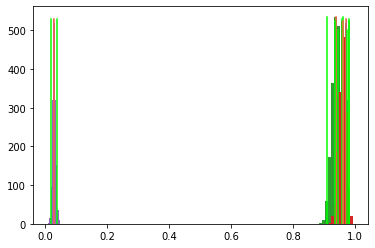

In [ ]:
#Training set results

#Accuracy
score, ci_lower, ci_upper, scores = stat_util.score_ci(Y_train, Y_pred2,
                                                       score_fun=accuracy_score,
                                                       seed=42)

bins = plt.hist(scores)
plt.plot([score, score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("Accuracy={:.6f}, 95% CI: {:.6f}-{:.6f}".format(score, ci_lower, ci_upper))

#AUROC
score, ci_lower, ci_upper, scores = stat_util.score_ci(Y_train, Y_pred2,
                                                       score_fun=roc_auc_score,
                                                       seed=42)

bins = plt.hist(scores)
plt.plot([score, score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("AUC={:.6f}, 95% CI: {:.6f}-{:.6f}".format(score, ci_lower, ci_upper))

#Recall
score, ci_lower, ci_upper, scores = stat_util.score_ci(Y_train, Y_pred2,
                                                       score_fun=recall_score,
                                                       seed=42)

bins = plt.hist(scores)
plt.plot([score, score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("Recall={:.6f}, 95% CI: {:.6f}-{:.6f}".format(score, ci_lower, ci_upper))

#Precision
score, ci_lower, ci_upper, scores = stat_util.score_ci(Y_train, Y_pred2,
                                                       score_fun=precision_score,
                                                       seed=42)

bins = plt.hist(scores)
plt.plot([score, score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("Precision={:.6f}, 95% CI: {:.6f}-{:.6f}".format(score, ci_lower, ci_upper))

#Brier score loss
score, ci_lower, ci_upper, scores = stat_util.score_ci(Y_train, Y_pred2,
                                                       score_fun=brier_score_loss,
                                                       seed=42)

bins = plt.hist(scores)
plt.plot([score, score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("Brier={:.6f}, 95% CI: {:.6f}-{:.6f}".format(score, ci_lower, ci_upper))

In [ ]:
#Transfer proababilistic predictions into excel

Y_pred1 = model.predict(X_test)

df_ANN_prob = pd.DataFrame(Y_pred1, columns = ['ANN_Predictions'])

df_ANN_prob.to_excel("output1.xlsx")

In [ ]:
Y_pred1

In [ ]:
Y_test

1050    0.0
1051    0.0
1052    0.0
1053    0.0
1054    0.0
       ... 
1495    0.0
1496    0.0
1497    0.0
1498    0.0
1499    1.0
Name: Acceptance Status, Length: 450, dtype: float64

Code break

In [ ]:
model.save("my_h5_model.h5")

In [ ]:
from google.colab import files
uploaded12 = files.upload()

Saving Validation dataset.xlsx to Validation dataset.xlsx


In [ ]:
import io
import cv2

# Training + Testing set

df1 = pd.read_excel(io.BytesIO(uploaded12['Validation dataset.xlsx']))

X1 = df1.drop(['Consultant', 'Acceptance Status'], axis = 1)
Y1 = df1['Acceptance Status']
object = StandardScaler()
X1[['GCS']] = object.fit_transform(df1[['GCS']])
X1[['Age']] = object.fit_transform(df1[['Age']])

In [ ]:
Y_pred1 = model.predict(X1)
#Y_pred1 = (Y_pred1 > 0.5)

In [ ]:
size = X_test.shape[0]**0.5
interval = np.mean(cvscores) + (1.96*(np.std(cvscores)/size))
print(interval)

size1 = X_test.shape[0]**0.5
interval1 = np.mean(cvscores) - (1.96*(np.std(cvscores)/size1))
print(interval1)

94.10569757380159
93.61447900376646


In [ ]:
Y_pred1 = model.predict(X_valid)

In [ ]:
Y_pred1.shape

(499, 1)

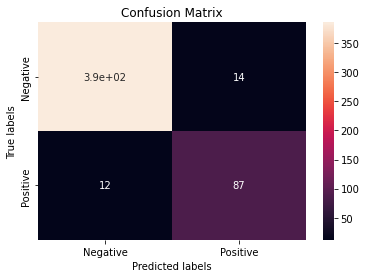

In [ ]:
from sklearn.metrics import confusion_matrix
ax = plt.subplot()
cm = confusion_matrix(Y1, Y_pred1)
sns.heatmap(cm , annot = True, ax = ax);
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Negative','Positive']); ax.yaxis.set_ticklabels(['Negative','Positive']);

In [ ]:
df2 = pd.DataFrame(Y_pred1, columns = ['Column_A'])

print(df2)
print(type(df2))

df2.to_excel("ANN output.xlsx")

     Column_A
0    0.132083
1    0.885418
2    0.215115
3    0.915587
4    0.000927
..        ...
494  0.620935
495  0.011361
496  0.000671
497  0.000810
498  0.003792

[499 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


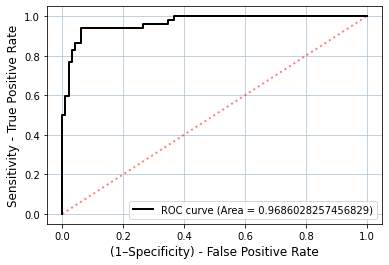

In [ ]:
from sklearn import metrics


fpr, tpr, thresholds = metrics.roc_curve(Y_valid, Y_pred1, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

lw = 2
plt.figure()
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle=':' , alpha = 0.5)
plt.plot(fpr, tpr, lw=lw, label=f'ROC curve (Area = {roc_auc})' , color = 'black')

plt.xlabel('(1–Specificity) - False Positive Rate', fontsize = 12)
plt.ylabel('Sensitivity - True Positive Rate', fontsize = 12)
plt.legend(loc="lower right") 
plt.grid(True, color="#B2C7D9")
plt.savefig("ANN ROC.pdf")
plt.show()

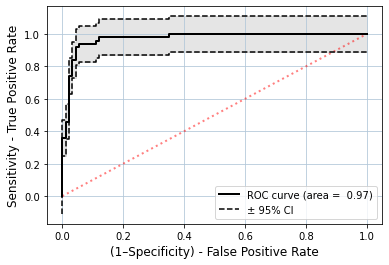

In [ ]:

from sklearn import metrics

Y_pred = model.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
ci = 1.96 * np.std(tpr)/np.sqrt(len(fpr))

lw = 2
plt.figure()
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle=':' , alpha = 0.5)
plt.plot(fpr, tpr, lw=lw, label=f'ROC curve (area = {roc_auc: 0.2f})' , color = 'black')
plt.fill_between(fpr, (tpr-ci), (tpr+ci), color = 'grey', alpha=0.2)
plt.plot(fpr, (tpr-ci), 'k--', label = "± 95% CI")
plt.plot(fpr, (tpr+ci), 'k--')

plt.xlabel('(1–Specificity) - False Positive Rate', fontsize = 12)
plt.ylabel('Sensitivity - True Positive Rate', fontsize = 12)
plt.legend(loc="lower right") 
plt.grid(True, color="#B2C7D9")
plt.show()

In [ ]:
model.save('my model')
tfjs.converters.save_keras_model(model, 'modelCV')

INFO:tensorflow:Assets written to: my model/assets


INFO:tensorflow:Assets written to: my model/assets


In [ ]:
#Creating and compiling the model
def build_model2_three_hiden_layers():
  model = Sequential()

  model.add(Dense(32, input_shape = (10,)))
  model.add(Dense(64, Activation ('relu')))
  model.add(Dense(64, Activation ('relu')))
  #model.add(Dropout(0.2))
  model.add(Dense(128, Activation ('relu')))
  #model.add(Dropout(0.2))
  model.add(Dense(128, Activation ('relu')))
  #model.add(Dropout(0.2))
  model.add(Dense(128, Activation ('relu')))
  #model.add(Dropout(0.2))
  model.add(Dense(128, Activation('relu')))
  #model.add(Dropout(0.2))
  model.add(Dense(128, Activation('relu')))
  #model.add(Dropout(0.2))
  model.add(Dense(256, Activation('relu')))
  #model.add(Dropout(0.2))
  model.add(Dense(512, Activation('relu')))
  model.add(Dropout(0.2))
  model.add(Dense(512, Activation('relu')))
  model.add(Dense(1, Activation('sigmoid')))
    

  learning_rate = 0.001
  optimizer = optimizers.Adam(learning_rate)
  model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=False), optimizer = optimizer, metrics = ['accuracy'])

  return model

model = build_model2_three_hiden_layers()

#Fitting the model


history = model.fit(
    X_train,
    Y_train,
    batch_size =17,
    epochs = 400,
    verbose = 0,
    shuffle = True,
    steps_per_epoch = 20,
    validation_data = (X_test, Y_test),
    #callbacks =[callbacks.EarlyStopping(monitor ="val_loss", 
                                        #mode ="min", patience = 3, 
                                        #restore_best_weights = True)],
)


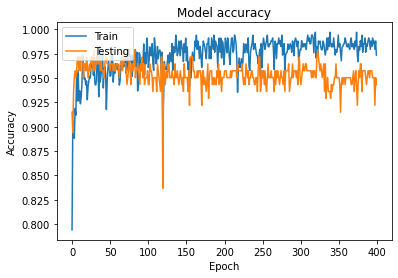

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Testing'], loc = 'upper left')
plt.show()

In [ ]:
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)

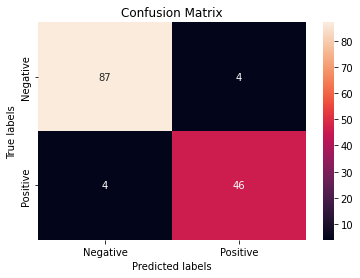

In [ ]:
from sklearn.metrics import confusion_matrix
ax = plt.subplot()
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm , annot = True, ax = ax);
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Negative','Positive']); ax.yaxis.set_ticklabels(['Negative','Positive']);
#plt.savefig("ANN confusion matrix.pdf")

In [ ]:
Y_pred.shape = (141,)
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import brier_score_loss

AUC=0.950, 95% CI: 0.896-0.990


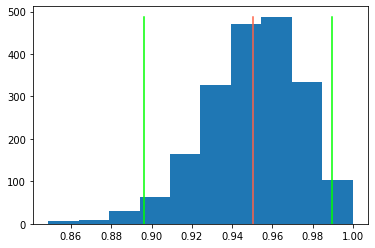

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import brier_score_loss
import stat_util

Y_pred = model.predict(X_test)
Y_pred.shape = (141,)

score, ci_lower, ci_upper, scores = stat_util.score_ci(Y_test, Y_pred,
                                                       score_fun=roc_auc_score)

bins = plt.hist(scores)
plt.plot([score, score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("AUC={:.3f}, 95% CI: {:.3f}-{:.3f}".format(score, ci_lower, ci_upper))

In [ ]:
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)
Y_pred.shape = (141,)

AUC=0.943, 95% CI: 0.901-0.979


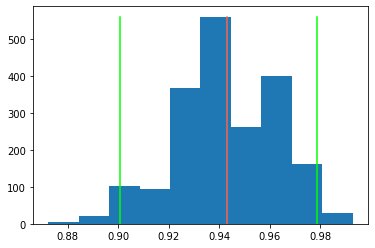

In [ ]:
import numpy as np
from scipy.stats import percentileofscore
from sklearn.metrics import accuracy_score



def score_ci(
    y_true,
    y_pred,
    score_fun,
    sample_weight=None,
    n_bootstraps=2000,
    confidence_level=0.95,
    seed=None,
    reject_one_class_samples=True,
):
    """
    Compute confidence interval for given score function based on labels and predictions using bootstrapping.
    :param y_true: 1D list or array of labels.
    :param y_pred: 1D list or array of predictions corresponding to elements in y_true.
    :param score_fun: Score function for which confidence interval is computed. (e.g. sklearn.metrics.accuracy_score)
    :param sample_weight: 1D list or array of sample weights to pass to score_fun, see e.g. sklearn.metrics.roc_auc_score.
    :param n_bootstraps: The number of bootstraps. (default: 2000)
    :param confidence_level: Confidence level for computing confidence interval. (default: 0.95)
    :param seed: Random seed for reproducibility. (default: None)
    :param reject_one_class_samples: Whether to reject bootstrapped samples with only one label. For scores like AUC we
    need at least one positive and one negative sample. (default: True)
    :return: Score evaluated on labels and predictions, lower confidence interval, upper confidence interval, array of
    bootstrapped scores.
    """

    assert len(y_true) == len(y_pred)

    score = score_fun(y_true, y_pred)
    _, ci_lower, ci_upper, scores = score_stat_ci(
        y_true=y_true,
        y_preds=y_pred,
        score_fun=score_fun,
        sample_weight=sample_weight,
        n_bootstraps=n_bootstraps,
        confidence_level=confidence_level,
        seed=seed,
        reject_one_class_samples=reject_one_class_samples,
    )

    return score, ci_lower, ci_upper, scores


def score_stat_ci(
    y_true,
    y_preds,
    score_fun,
    stat_fun=np.mean,
    sample_weight=None,
    n_bootstraps=2000,
    confidence_level=0.95,
    seed=None,
    reject_one_class_samples=True,
):
    """
    Compute confidence interval for given statistic of a score function based on labels and predictions using
    bootstrapping.
    :param y_true: 1D list or array of labels.
    :param y_preds: A list of lists or 2D array of predictions corresponding to elements in y_true.
    :param score_fun: Score function for which confidence interval is computed. (e.g. sklearn.metrics.accuracy_score)
    :param stat_fun: Statistic for which confidence interval is computed. (e.g. np.mean)
    :param sample_weight: 1D list or array of sample weights to pass to score_fun, see e.g. sklearn.metrics.roc_auc_score.
    :param n_bootstraps: The number of bootstraps. (default: 2000)
    :param confidence_level: Confidence level for computing confidence interval. (default: 0.95)
    :param seed: Random seed for reproducibility. (default: None)
    :param reject_one_class_samples: Whether to reject bootstrapped samples with only one label. For scores like AUC we
    need at least one positive and one negative sample. (default: True)
    :return: Mean score statistic evaluated on labels and predictions, lower confidence interval, upper confidence
    interval, array of bootstrapped scores.
    """

    y_true = np.array(y_true)
    y_preds = np.atleast_2d(y_preds)
    assert all(len(y_true) == len(y) for y in y_preds)

    np.random.seed(seed)
    scores = []
    for i in range(n_bootstraps):
        readers = np.random.randint(0, len(y_preds), len(y_preds))
        indices = np.random.randint(0, len(y_true), len(y_true))
        if reject_one_class_samples and len(np.unique(y_true[indices])) < 2:
            continue
        reader_scores = []
        for r in readers:
            if sample_weight is not None:
                reader_scores.append(score_fun(y_true[indices], y_preds[r][indices], sample_weight=sample_weight[indices]))
            else:
                reader_scores.append(score_fun(y_true[indices], y_preds[r][indices]))
        scores.append(stat_fun(reader_scores))

    mean_score = np.mean(scores)
    sorted_scores = np.array(sorted(scores))
    alpha = (1.0 - confidence_level) / 2.0
    ci_lower = sorted_scores[int(round(alpha * len(sorted_scores)))]
    ci_upper = sorted_scores[int(round((1.0 - alpha) * len(sorted_scores)))]
    return mean_score, ci_lower, ci_upper, scores


def pvalue(
    y_true,
    y_pred1,
    y_pred2,
    score_fun,
    sample_weight=None,
    n_bootstraps=2000,
    two_tailed=True,
    seed=None,
    reject_one_class_samples=True,
):
    """
    Compute p-value for hypothesis that score function for model I predictions is higher than for model II predictions
    using bootstrapping.
    :param y_true: 1D list or array of labels.
    :param y_pred1: 1D list or array of predictions for model I corresponding to elements in y_true.
    :param y_pred2: 1D list or array of predictions for model II corresponding to elements in y_true.
    :param score_fun: Score function for which confidence interval is computed. (e.g. sklearn.metrics.accuracy_score)
    :param sample_weight: 1D list or array of sample weights to pass to score_fun, see e.g. sklearn.metrics.roc_auc_score.
    :param n_bootstraps: The number of bootstraps. (default: 2000)
    :param two_tailed: Whether to use two-tailed test. (default: True)
    :param seed: Random seed for reproducibility. (default: None)
    :param reject_one_class_samples: Whether to reject bootstrapped samples with only one label. For scores like AUC we
    need at least one positive and one negative sample. (default: True)
    :return: Computed p-value, array of bootstrapped differences of scores.
    """

    assert len(y_true) == len(y_pred1)
    assert len(y_true) == len(y_pred2)

    return pvalue_stat(
        y_true=y_true,
        y_preds1=y_pred1,
        y_preds2=y_pred2,
        score_fun=score_fun,
        sample_weight=sample_weight,
        n_bootstraps=n_bootstraps,
        two_tailed=two_tailed,
        seed=seed,
        reject_one_class_samples=reject_one_class_samples,
    )


def pvalue_stat(
    y_true,
    y_preds1,
    y_preds2,
    score_fun,
    stat_fun=np.mean,
    compare_fun=np.subtract,
    sample_weight=None,
    n_bootstraps=2000,
    two_tailed=True,
    seed=None,
    reject_one_class_samples=True,
):
    """
    Compute p-value for hypothesis that given statistic of score function for model I predictions is higher than for
    model II predictions using bootstrapping.
    :param y_true: 1D list or array of labels.
    :param y_preds1: A list of lists or 2D array of predictions for model I corresponding to elements in y_true.
    :param y_preds2: A list of lists or 2D array of predictions for model II corresponding to elements in y_true.
    :param score_fun: Score function for which confidence interval is computed. (e.g. sklearn.metrics.accuracy_score)
    :param stat_fun: Statistic for which p-value is computed. (e.g. np.mean)
    :param compare_fun: Function to determine relative performance. (default: score1 - score2)
    :param sample_weight: 1D list or array of sample weights to pass to score_fun, see e.g. sklearn.metrics.roc_auc_score.
    :param n_bootstraps: The number of bootstraps. (default: 2000)
    :param two_tailed: Whether to use two-tailed test. (default: True)
    :param seed: Random seed for reproducibility. (default: None)
    :param reject_one_class_samples: Whether to reject bootstrapped samples with only one label. For scores like AUC we
    need at least one positive and one negative sample. (default: True)
    :return: Computed p-value, array of bootstrapped differences of scores.
    """

    y_true = np.array(y_true)
    y_preds1 = np.atleast_2d(y_preds1)
    y_preds2 = np.atleast_2d(y_preds2)
    assert all(len(y_true) == len(y) for y in y_preds1)
    assert all(len(y_true) == len(y) for y in y_preds2)

    np.random.seed(seed)
    z = []
    for i in range(n_bootstraps):
        readers1 = np.random.randint(0, len(y_preds1), len(y_preds1))
        readers2 = np.random.randint(0, len(y_preds2), len(y_preds2))
        indices = np.random.randint(0, len(y_true), len(y_true))
        if reject_one_class_samples and len(np.unique(y_true[indices])) < 2:
            continue
        reader1_scores = []
        for r in readers1:
            if sample_weight is not None:
                reader1_scores.append(score_fun(y_true[indices], y_preds1[r][indices], sample_weight=sample_weight[indices]))
            else:
                reader1_scores.append(score_fun(y_true[indices], y_preds1[r][indices]))
        score1 = stat_fun(reader1_scores)
        reader2_scores = []
        for r in readers2:
            if sample_weight is not None:
                reader2_scores.append(score_fun(y_true[indices], y_preds2[r][indices], sample_weight=sample_weight[indices]))
            else:
                reader2_scores.append(score_fun(y_true[indices], y_preds2[r][indices]))
        score2 = stat_fun(reader2_scores)
        z.append(compare_fun(score1, score2))

    p = percentileofscore(z, 0.0, kind="weak") / 100.0
    if two_tailed:
        p *= 2.0
    return p, z

#Accuracy
score, ci_lower, ci_upper, scores = score_ci(Y_test, Y_pred,
                                                       score_fun=accuracy_score,
                                                       seed=42)

bins = plt.hist(scores)
plt.plot([score, score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("AUC={:.3f}, 95% CI: {:.3f}-{:.3f}".format(score, ci_lower, ci_upper))

AUC=0.920, 95% CI: 0.837-0.981


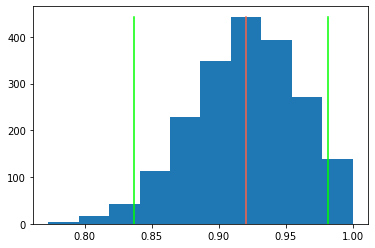

In [ ]:

#Precision
score, ci_lower, ci_upper, scores = score_ci(Y_test, Y_pred,
                                                       score_fun=precision_score,
                                                       seed=42)

bins = plt.hist(scores)
plt.plot([score, score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("AUC={:.3f}, 95% CI: {:.3f}-{:.3f}".format(score, ci_lower, ci_upper))

AUC=0.920, 95% CI: 0.838-0.981


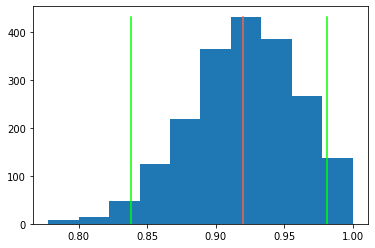

In [ ]:
#Recall
score, ci_lower, ci_upper, scores = score_ci(Y_test, Y_pred,
                                                       score_fun=recall_score,
                                                       seed=42)

bins = plt.hist(scores)
plt.plot([score, score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("AUC={:.3f}, 95% CI: {:.3f}-{:.3f}".format(score, ci_lower, ci_upper))

AUC=0.057, 95% CI: 0.021-0.099


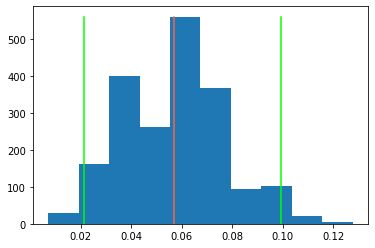

In [ ]:
#Brier score loss
score, ci_lower, ci_upper, scores = score_ci(Y_test, Y_pred,
                                                       score_fun=brier_score_loss,
                                                       seed=42)

bins = plt.hist(scores)
plt.plot([score, score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("AUC={:.3f}, 95% CI: {:.3f}-{:.3f}".format(score, ci_lower, ci_upper))

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred.shape
Y_pred.shape = (141,)

In [ ]:
from sklearn.calibration import calibration_curve
prob_true_binary1, prob_pred_binary1 = calibration_curve(Y_test, Y_pred, n_bins=9, normalize = False)
prob_pred_binary1.shape

(7,)

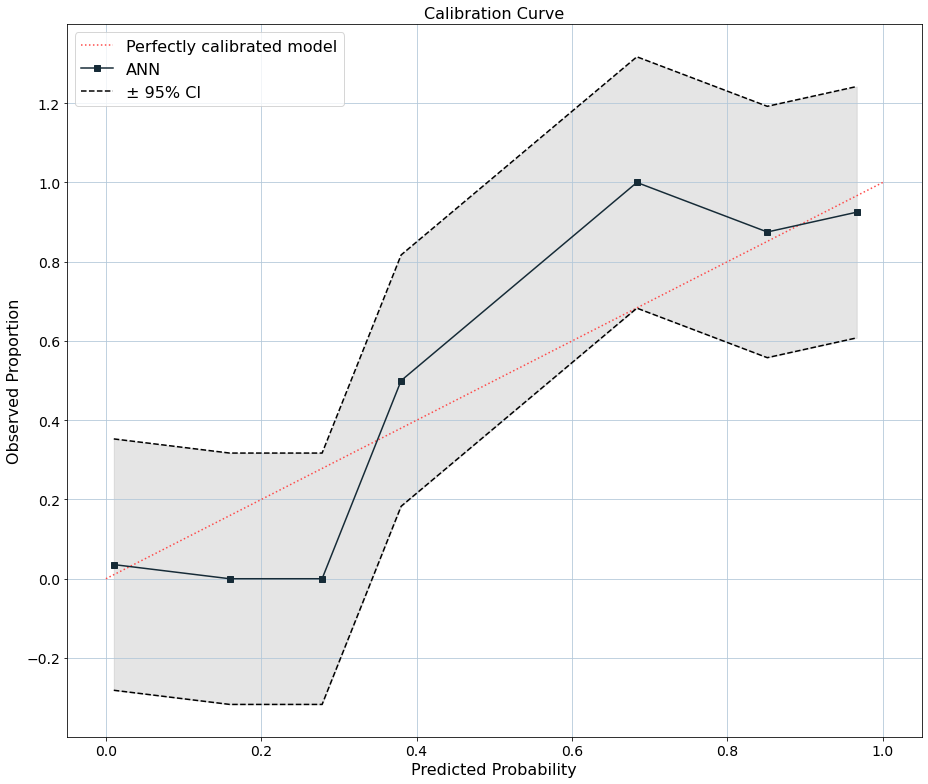

In [ ]:
# Calibration curves
def plot_reliability_diagram(prob_true, prob_pred, model_name, ax=None):
    # Plot the calibration curve for ResNet in comparison with what a perfectly calibrated model would look like
    if ax==None:
        fig = plt.figure(figsize=(13, 11))
        ax = plt.gca()
    else:
        plt.sca(ax)
    
    plt.plot([0, 1], [0, 1], color="#FE4A49", linestyle=":", label="Perfectly calibrated model")
    plt.plot(prob_pred, prob_true, "s-", label=model_name, color="#162B37")

    ci = 1.96 * np.std(prob_true_binary1)/np.sqrt(len(prob_pred_binary1))

    plt.ylabel("Observed Proportion", fontsize=16)
    plt.xlabel("Predicted Probability", fontsize=16)
    plt.title("Calibration Curve", fontsize = 16)
    ax.fill_between(prob_pred_binary1, (prob_true_binary1-ci), (prob_true_binary1+ci), color = 'grey', alpha=0.2)
    ax.plot(prob_pred_binary1, (prob_true_binary1-ci), 'k--', label = "± 95% CI")
    ax.plot(prob_pred_binary1, (prob_true_binary1+ci), 'k--')

    plt.legend(fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.grid(True, color="#B2C7D9")

    plt.tight_layout()

plot_reliability_diagram(prob_true_binary1, prob_pred_binary1, "ANN")
plt.savefig('Calibration plot1.pdf')

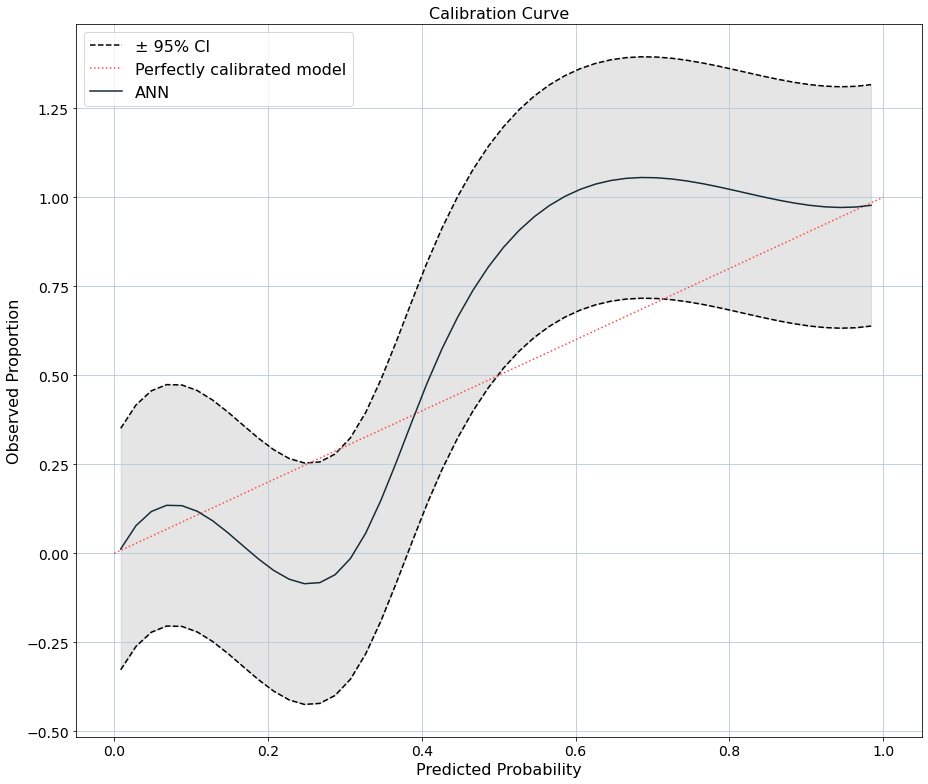

In [ ]:
# Calibration curves
import scipy
from scipy.interpolate import make_interp_spline

fig = plt.figure(figsize=(13, 11))
ax = plt.gca()

ci = 1.96 * np.std(prob_true_binary1)/np.sqrt(len(prob_pred_binary1))

prob_true_binary2 = prob_true_binary1-ci
prob_true_binary3 = prob_true_binary1+ci

CI_Spline1 = make_interp_spline(prob_pred_binary1, prob_true_binary2)
CI_1 = np.linspace(prob_pred_binary1.min(), prob_pred_binary1.max(), 50)
CI_Y1 = CI_Spline1(CI_1)
ax.plot(CI_1, CI_Y1, 'k--', label = "± 95% CI")

CI_Spline2 = make_interp_spline(prob_pred_binary1, prob_true_binary3)
CI_2 = np.linspace(prob_pred_binary1.min(), prob_pred_binary1.max(), 50)
CI_Y2 = CI_Spline2(CI_2)
ax.plot(CI_2, CI_Y2, 'k--')

X_Y_Spline = make_interp_spline(prob_pred_binary1, prob_true_binary1)
X_ = np.linspace(prob_pred_binary1.min(), prob_pred_binary1.max(), 50)
Y_ = X_Y_Spline(X_)

plt.ylabel("Observed Proportion", fontsize=16)
plt.xlabel("Predicted Probability", fontsize=16)
plt.title("Calibration Curve", fontsize = 16)
ax.fill_between(X_, CI_Y1, CI_Y2, color = 'grey', alpha=0.2)

plt.plot([0, 1], [0, 1], color="#FE4A49", linestyle=":", label="Perfectly calibrated model")
plt.plot(X_, Y_, "-", label="ANN", color="#162B37")

#ax.plot(prob_pred_binary1, (prob_true_binary1-ci), 'k--', label = "± 95% CI")
#ax.plot(prob_pred_binary1, (prob_true_binary1+ci), 'k--')

plt.legend(fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True, color="#B2C7D9")

plt.tight_layout()
plt.savefig('Calibration plot4.pdf')

In [ ]:
 from scipy.optimize import curve_fit

def objective(x, a,b ):
    return a*x + b

x , y = prob_pred_binary1, prob_true_binary1 
popt, _ = curve_fit(objective, x, y)

a, b = popt

print('y = %.5f * x + %.5f' % (a,b))

Validation Set

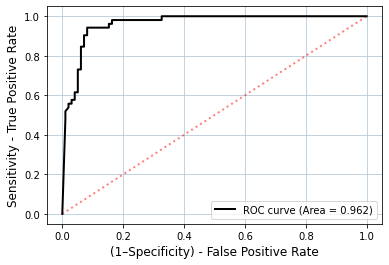

In [ ]:
#ROC curve
Y_pred1 = model.predict(X_valid)
from sklearn import metrics


fpr, tpr, thresholds = metrics.roc_curve(Y_valid, Y_pred1, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

lw = 2
plt.figure()
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle=':' , alpha = 0.5)
plt.plot(fpr, tpr, lw=lw, label=f'ROC curve (Area = {roc_auc :0.3f})' , color = 'black')

plt.xlabel('(1–Specificity) - False Positive Rate', fontsize = 12)
plt.ylabel('Sensitivity - True Positive Rate', fontsize = 12)
plt.legend(loc="lower right") 
plt.grid(True, color="#B2C7D9")
plt.savefig("ANN ROC.pdf")
plt.show()

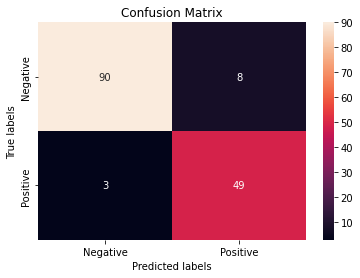

In [ ]:
#Analysis of Validation set
Y_pred1 = model.predict(X_valid)
Y_pred1 = (Y_pred1 > 0.5)
Y_pred1.shape = (150,)

from sklearn.metrics import confusion_matrix
ax = plt.subplot()
cm = confusion_matrix(Y_valid, Y_pred1)
sns.heatmap(cm , annot = True, ax = ax);
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Negative','Positive']); ax.yaxis.set_ticklabels(['Negative','Positive']);

AUC=0.962, 95% CI: 0.933-0.985


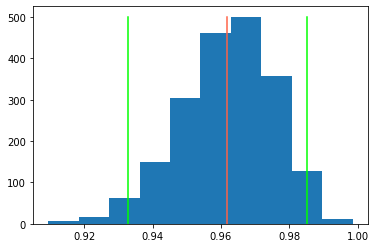

In [ ]:
#AUROC
Y_pred1 = model.predict(X_valid)
Y_pred1.shape = (150,)
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import brier_score_loss
import stat_util

score, ci_lower, ci_upper, scores = stat_util.score_ci(Y_valid, Y_pred1,
                                                       score_fun=roc_auc_score)

bins = plt.hist(scores)
plt.plot([score, score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("AUC={:.3f}, 95% CI: {:.3f}-{:.3f}".format(score, ci_lower, ci_upper))

Accuracy=0.927, 95% CI: 0.880-0.960


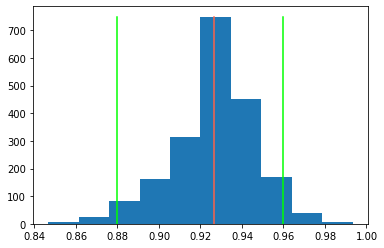

In [ ]:
#Accuracy
Y_pred1 = model.predict(X_valid)
Y_pred1 = (Y_pred1 > 0.5)
Y_pred1.shape = (150,)
score, ci_lower, ci_upper, scores = stat_util.score_ci(Y_valid, Y_pred1,
                                                       score_fun=accuracy_score,
                                                       seed=42)

bins = plt.hist(scores)
plt.plot([score, score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("Accuracy={:.3f}, 95% CI: {:.3f}-{:.3f}".format(score, ci_lower, ci_upper))

AUC=0.942, 95% CI: 0.868-1.000


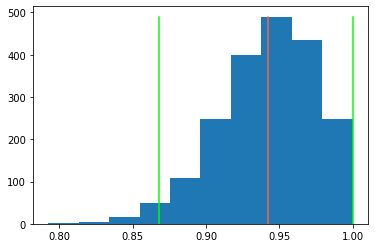

In [ ]:
#Recall
score, ci_lower, ci_upper, scores = score_ci(Y_valid, Y_pred1,
                                                       score_fun=recall_score,
                                                       seed=42)

bins = plt.hist(scores)
plt.plot([score, score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("AUC={:.3f}, 95% CI: {:.3f}-{:.3f}".format(score, ci_lower, ci_upper))

AUC=0.860, 95% CI: 0.764-0.940


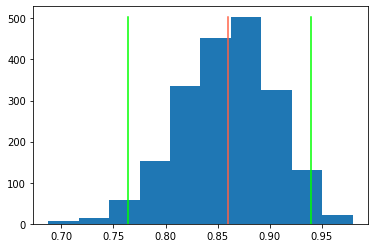

In [ ]:
#Precision
score, ci_lower, ci_upper, scores = score_ci(Y_valid, Y_pred1,
                                                       score_fun=precision_score,
                                                       seed=42)

bins = plt.hist(scores)
plt.plot([score, score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("AUC={:.3f}, 95% CI: {:.3f}-{:.3f}".format(score, ci_lower, ci_upper))

AUC=0.073, 95% CI: 0.040-0.120


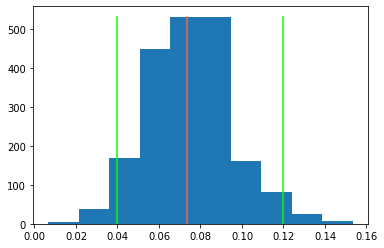

In [ ]:
#Brier score loss
score, ci_lower, ci_upper, scores = score_ci(Y_valid, Y_pred1,
                                                       score_fun=brier_score_loss,
                                                       seed=42)

bins = plt.hist(scores)
plt.plot([score, score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("AUC={:.3f}, 95% CI: {:.3f}-{:.3f}".format(score, ci_lower, ci_upper))

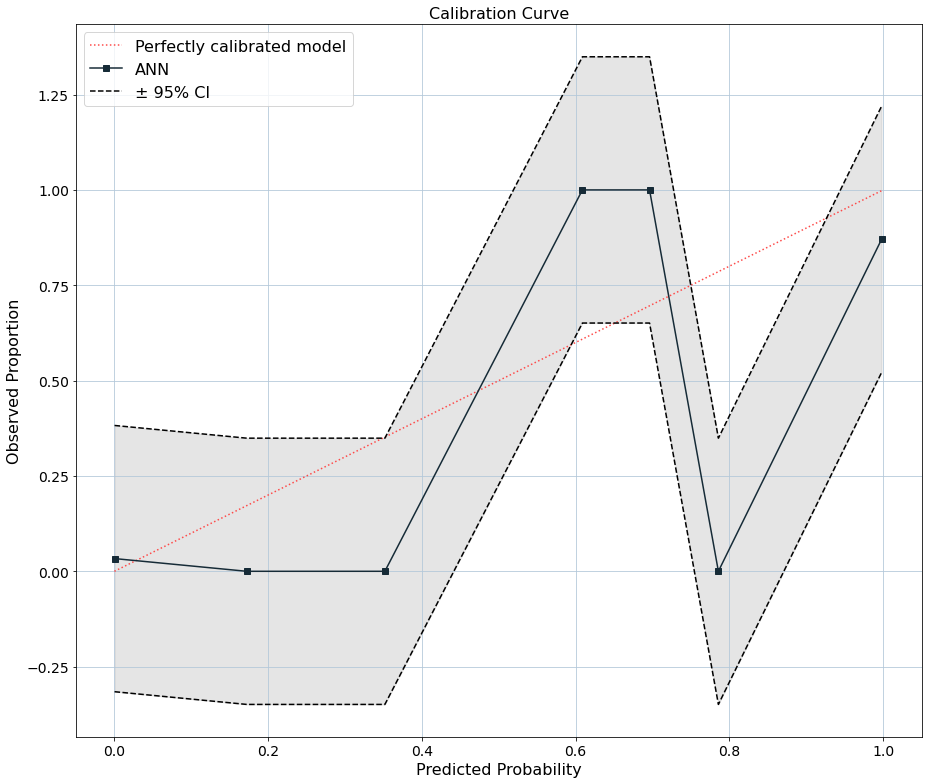

In [ ]:
#Calibration curve
Y_pred = model.predict(X_valid)
from sklearn.calibration import calibration_curve
prob_true_binary1, prob_pred_binary1 = calibration_curve(Y_valid, Y_pred, n_bins=9, normalize = False)
prob_pred_binary1.shape

def plot_reliability_diagram(prob_true, prob_pred, model_name, ax=None):
    # Plot the calibration curve for ResNet in comparison with what a perfectly calibrated model would look like
    if ax==None:
        fig = plt.figure(figsize=(13, 11))
        ax = plt.gca()
    else:
        plt.sca(ax)
    
    plt.plot([0, 1], [0, 1], color="#FE4A49", linestyle=":", label="Perfectly calibrated model")
    plt.plot(prob_pred, prob_true, "s-", label=model_name, color="#162B37")

    ci = 1.96 * np.std(prob_true_binary1)/np.sqrt(len(prob_pred_binary1))

    plt.ylabel("Observed Proportion", fontsize=16)
    plt.xlabel("Predicted Probability", fontsize=16)
    plt.title("Calibration Curve", fontsize = 16)
    ax.fill_between(prob_pred_binary1, (prob_true_binary1-ci), (prob_true_binary1+ci), color = 'grey', alpha=0.2)
    ax.plot(prob_pred_binary1, (prob_true_binary1-ci), 'k--', label = "± 95% CI")
    ax.plot(prob_pred_binary1, (prob_true_binary1+ci), 'k--')

    plt.legend(fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.grid(True, color="#B2C7D9")

    plt.tight_layout()

plot_reliability_diagram(prob_true_binary1, prob_pred_binary1, "ANN")
plt.savefig('Calibration plot3.pdf')

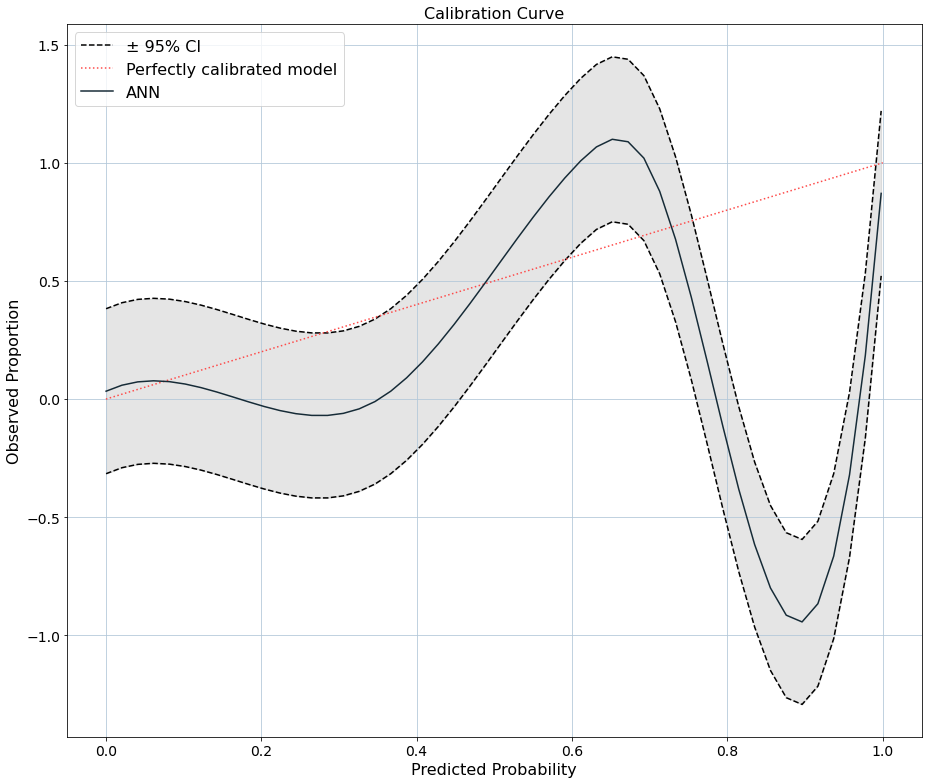

In [ ]:
import scipy
from scipy.interpolate import make_interp_spline

fig = plt.figure(figsize=(13, 11))
ax = plt.gca()

ci = 1.96 * np.std(prob_true_binary1)/np.sqrt(len(prob_pred_binary1))

prob_true_binary2 = prob_true_binary1-ci
prob_true_binary3 = prob_true_binary1+ci

CI_Spline1 = make_interp_spline(prob_pred_binary1, prob_true_binary2)
CI_1 = np.linspace(prob_pred_binary1.min(), prob_pred_binary1.max(), 50)
CI_Y1 = CI_Spline1(CI_1)
ax.plot(CI_1, CI_Y1, 'k--', label = "± 95% CI")

CI_Spline2 = make_interp_spline(prob_pred_binary1, prob_true_binary3)
CI_2 = np.linspace(prob_pred_binary1.min(), prob_pred_binary1.max(), 50)
CI_Y2 = CI_Spline2(CI_2)
ax.plot(CI_2, CI_Y2, 'k--')

X_Y_Spline = make_interp_spline(prob_pred_binary1, prob_true_binary1)
X_ = np.linspace(prob_pred_binary1.min(), prob_pred_binary1.max(), 50)
Y_ = X_Y_Spline(X_)

plt.ylabel("Observed Proportion", fontsize=16)
plt.xlabel("Predicted Probability", fontsize=16)
plt.title("Calibration Curve", fontsize = 16)
ax.fill_between(X_, CI_Y1, CI_Y2, color = 'grey', alpha=0.2)

plt.plot([0, 1], [0, 1], color="#FE4A49", linestyle=":", label="Perfectly calibrated model")
plt.plot(X_, Y_, "-", label="ANN", color="#162B37")

#ax.plot(prob_pred_binary1, (prob_true_binary1-ci), 'k--', label = "± 95% CI")
#ax.plot(prob_pred_binary1, (prob_true_binary1+ci), 'k--')

plt.legend(fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True, color="#B2C7D9")

plt.tight_layout()
plt.savefig('Calibration plot4.pdf')

In [ ]:
from scipy.optimize import curve_fit

def objective(x, a,b ):
    return a*x + b

x , y = prob_pred_binary1, prob_true_binary1 
popt, _ = curve_fit(objective, x, y)

a, b = popt

print('y = %.5f * x + %.5f' % (a,b))

y = 0.89123 * x + -0.04515
